## Section 2: Let's code

Today will just be a short introduction into running regressions with R.
We first read in the sleepdata dataset from the wooldridge package.


In [1]:
install.packages('wooldridge')
data(sleep75, package = 'wooldridge')
sleepdata <- sleep75

Installing package into ‘/opt/r’
(as ‘lib’ is unspecified)



Let us have a look at the data:

In [2]:
colnames(sleepdata)
head(sleepdata)

[1] "age"      "black"    "case"     "clerical" "construc" "educ"    
 [7] "earns74"  "gdhlth"   "inlf"     "leis1"    "leis2"    "leis3"   
[13] "smsa"     "lhrwage"  "lothinc"  "male"     "marr"     "prot"    
[19] "rlxall"   "selfe"    "sleep"    "slpnaps"  "south"    "spsepay" 
[25] "spwrk75"  "totwrk"   "union"    "worknrm"  "workscnd" "exper"   
[31] "yngkid"   "yrsmarr"  "hrwage"   "agesq"

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,⋯,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,32,0,1,0,0,12,0,0,1,3529,⋯,0,3438,0,3438,0,14,0,13,7.070004,1024
2,31,0,2,0,0,14,9500,1,1,2140,⋯,0,5020,0,5020,0,11,0,0,1.429999,961
3,44,0,3,0,0,17,42500,1,1,4595,⋯,1,2815,0,2815,0,21,0,0,20.529997,1936
4,30,0,4,0,0,12,42500,1,1,3211,⋯,1,3786,0,3786,0,12,0,12,9.619998,900
5,64,0,5,0,0,14,2500,1,1,4052,⋯,1,2580,0,2580,0,44,0,33,2.750000,4096
6,41,0,6,0,0,12,0,1,1,4812,⋯,0,1205,0,0,1205,23,0,23,19.249998,1681


A couple of warm-up quiz questions for you:
* How many observations are there in the dataset?
* How many variables are there in the dataset?
* What proportion of the observations is a union member?
* What is the average number of minutes of work (per week) in the data?

In [3]:
dim(sleepdata)

# Union
mean(sleepdata$union)

mean(sleepdata$totwrk)

# Let us format these in a nicer way
print(round(mean(sleepdata$union),2))
print(round(mean(sleepdata$totwrk),0))

[1] 706  34

[1] 0.2181303

[1] 2122.921

[1] 0.22
[1] 2123


Let us summarize the sleep data, in hours of sleep per night. What are mean and standard deviation? How does the data look like? Is there anything you notice?

[1] 7.777037

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.798   7.179   7.787   7.777   8.410  11.179 

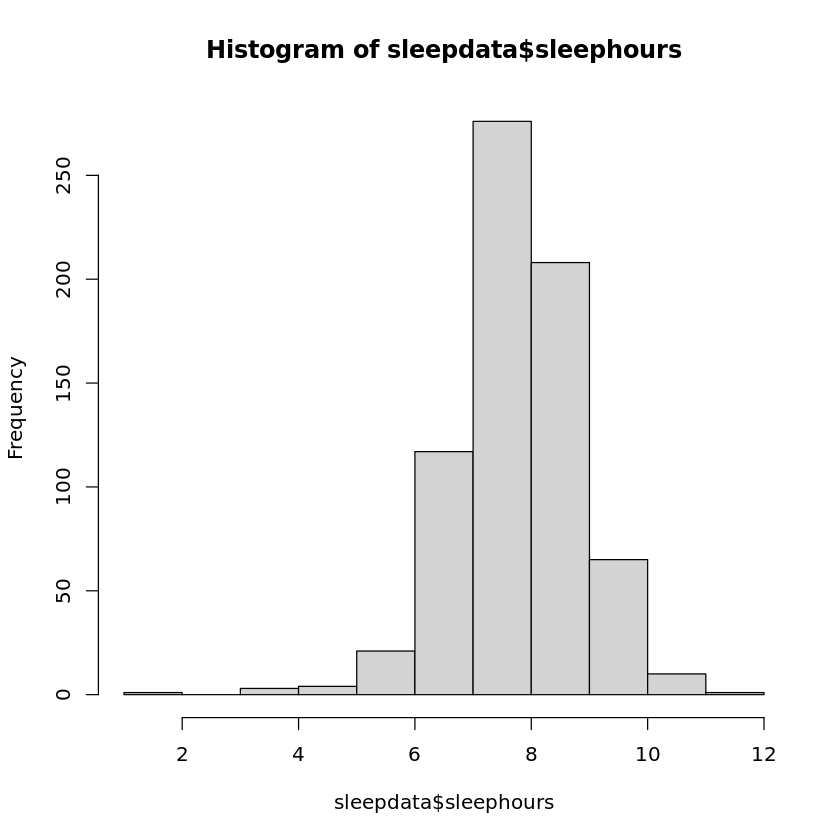

In [4]:
sleepdata$sleephours = sleepdata$sleep/60/7
mean(sleepdata$sleephours)
summary(sleepdata$sleephours)
hist(sleepdata$sleephours)


## Digging more into the data: Do union members sleep more?

We start with a basic linear model of sleep ($S_i$), which we regress on union membership ($U_i$):

$$
S_i = \alpha + \beta_u \cdot \text{U}_i + \epsilon_i
$$

How would you run this in ```R```?

In [5]:
union_regression = summary(lm(sleephours ~ union , data=sleepdata))
print(union_regression)



Call:
lm(formula = sleephours ~ union, data = sleepdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9739 -0.5929  0.0142  0.6329  3.3816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.77147    0.04507 172.444   <2e-16 ***
union        0.02551    0.09649   0.264    0.792    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.059 on 704 degrees of freedom
Multiple R-squared:  9.93e-05,	Adjusted R-squared:  -0.001321 
F-statistic: 0.06991 on 1 and 704 DF,  p-value: 0.7915



Let us interpret this regression output. 
* **What is the meaning of the intercept?**
Answer: The intercept is always the 'conditional mean': The expected value of the outcome variable, conditional on all other variables being zero. Here, it is simply the average hours of nightly sleep for non-union-members.
* **What is the meaning of the coefficient on "union"?**
This shows the difference in average hours of nightly sleep between union- and non-union-members.
* **What do the other parts of the output mean?**
Interpretation of standard error (measure of precision of estimate: The smaller the standard error, the more precise the estimate), and t-statistic (coefficient divided by standard error). A t-statistic above 2 is equivalent to a p-value below 0.05. 
In this case, we fail to reject the null hypothesis.



Below we see that just taking means exactly corresponds to the regression output - but we can do so much more with regressions.

In [6]:
mean(sleepdata$sleephours[sleepdata$union==0])
mean(sleepdata$sleephours[sleepdata$union==1])

mean(sleepdata$sleephours[sleepdata$union==1]) - mean(sleepdata$sleephours[sleepdata$union==0])

[1] 7.771472

[1] 7.796985

[1] 0.02551345